# What is RFM (recency, frequency, monetary) analysis?

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

RFM analysis ranks each customer on the following factors:

# Recency :  
How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

# Frequency : 
How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

# Monetary : 
How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

.

RFM analysis scores customers on each of the three main factors. Generally, a score from 1 to 5 is given, with 5 being the highest. Various implementations of an RFM analysis system may use slightly different values or scaling, however.

The collection of three values for each customer is called an RFM cell. In a simple system, organizations average these values together, then sort customers from highest to lowest to find the most valuable customers.

We can use RFM analysis to identify clusters of customers with similar values. Called customer segmentation, this process is used to produce targeted direct marketing campaigns tailored to specific customer types. It enables businesses to use email or direct mail marketing to target messages that a large swath of specific kinds of customers are more likely to respond to.

The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.

Some examples of customer types include:

# Whales : 
The biggest customers with high (5,5,5) values in all three factors that should be targeted with special promotions to keep them active.

# New customers :
Customers with high recency and low frequency (5,1,X) are new customers. A targeted follow-up may convert them into repeat customers.

# Lapsed customers :
Customers with low recency but high value (1,X,5) were once valuable customers but have since stopped. A targeted message may reactivate them.

In [1]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
tx_data = pd.read_excel('Online Retail.xlsx')
tx_data.drop('Country',axis=1,inplace=True)

In [3]:
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0


In [4]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

In [5]:
tx_data['InvoiceDate'].describe()

<ipython-input-5-38da000cae74>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tx_data['InvoiceDate'].describe()


count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [6]:
tx_user = pd.DataFrame(tx_data['CustomerID'].unique())
tx_user.columns = ['CustomerID']

In [7]:
# RFM Analysis
# **RFM** (Recency, Frequency, Monetary) analysis first we need to create three features R , F & M from the data 

# Recency


To calculate recency, we need to find out  **when was the customer's most recent purchase.**.
Create a new column called date which contains the date of invoice only

In [8]:
# Group by customers and check last date of purchase
tx_max_purchase = tx_data.groupby('CustomerID').InvoiceDate.max().reset_index()

In [9]:
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [10]:
# Calculate the most recent date of purchase to find recency of a customer wrt to this date

tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

In [11]:
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')

In [12]:
tx_user.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,329


In [13]:
tx_user.Recency.describe()

count    4372.000000
mean       91.047118
std       100.765435
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

(array([1933.,  801.,  350.,  238.,  228.,  188.,  189.,  164.,  145.,
         136.]),
 array([  0. ,  37.3,  74.6, 111.9, 149.2, 186.5, 223.8, 261.1, 298.4,
        335.7, 373. ]),
 <BarContainer object of 10 artists>)

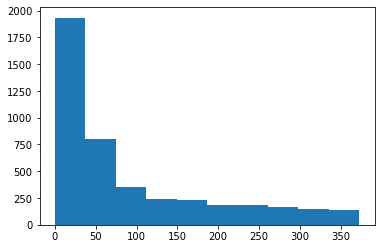

In [14]:
plt.hist(tx_user.Recency)

In [15]:
from sklearn.cluster import KMeans

In [ ]:
for i in range(1,10):
    KMeans(i).fit(tx_user[['Recency']]).inertia_

In [16]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

In [17]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [18]:
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [51]:
tx_user

,CustomerID,Recency,RecencyCluster
0,17850.0,301,1
1,15100.0,329,1
2,18085.0,329,1
3,14496.0,311,1
4,16546.0,290,1
...,...,...,...
4367,16178.0,137,4
4368,17040.0,137,4
4369,14100.0,137,4
4370,13296.0,136,4


In [19]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,129.0,364.108527,6.823947,339.0,359.0,365.0,371.00,373.0
1,199.0,310.638191,14.575465,284.0,300.0,311.0,322.00,337.0
2,286.0,256.426573,15.750016,231.0,242.0,256.5,268.75,283.0
3,280.0,199.657143,15.040815,175.0,186.0,199.0,213.00,227.0
4,303.0,149.627063,14.554176,126.0,137.0,150.0,162.00,174.0
5,337.0,101.314540,12.318765,83.0,91.0,100.0,112.00,125.0
6,685.0,63.081752,9.890144,47.0,54.0,63.0,72.00,82.0
7,881.0,30.942111,7.749197,20.0,24.0,30.0,37.00,46.0
8,1272.0,7.922956,5.807457,0.0,3.0,8.0,13.00,19.0


# Frequency


To calculate Frequency we need to check **How often a customer makes a purchase**.

In [20]:
tx_frequency = tx_data.groupby('CustomerID').InvoiceDate.count().reset_index()

In [21]:
tx_frequency.columns = ['CustomerID','Frequency']

In [22]:
tx_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [23]:
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')

In [24]:
tx_user

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,301,1,312
1,15100.0,329,1,6
2,18085.0,329,1,29
3,14496.0,311,1,19
4,16546.0,290,1,31
...,...,...,...,...
4367,15254.0,126,4,18
4368,18099.0,126,4,19
4369,13218.0,126,4,5
4370,17267.0,126,4,38


In [25]:
tx_user.Frequency.describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: Frequency, dtype: float64

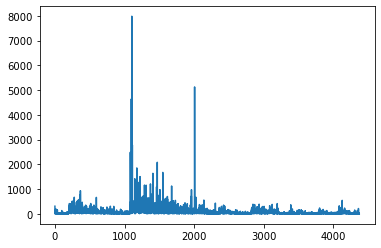

In [26]:
plt.plot(tx_user.Frequency)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



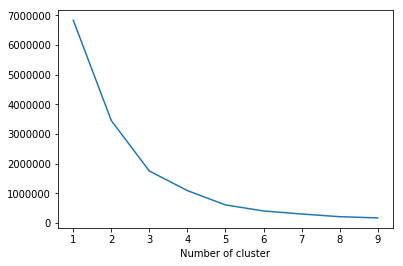

In [34]:
sse={}
tx_frequency = tx_user[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

In [28]:
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

In [29]:
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,301,1,312,3
1,16029.0,38,7,274,3
2,15513.0,30,7,314,3
3,14849.0,21,7,392,3
4,17377.0,23,7,419,3
...,...,...,...,...,...
4367,14646.0,1,8,2085,6
4368,12748.0,0,8,4642,7
4369,14911.0,0,8,5903,7
4370,14096.0,3,8,5128,7


In [30]:
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2560.0,22.689062,14.811707,1.0,10.00,21.0,33.00,55.0
1,1040.0,88.864423,22.977369,56.0,69.00,86.0,107.00,136.0
2,459.0,185.834423,35.592963,137.0,155.00,177.0,214.00,263.0
3,212.0,341.023585,57.075276,264.0,293.75,327.0,385.00,463.0
4,74.0,588.554054,97.864058,468.0,503.50,562.0,666.50,872.0
5,19.0,1174.052632,233.800835,898.0,996.00,1128.0,1248.00,1677.0
6,4.0,2303.750000,412.804534,1857.0,2028.00,2288.0,2563.75,2782.0
7,3.0,5224.333333,635.995545,4642.0,4885.00,5128.0,5515.50,5903.0
8,1.0,7983.000000,NaN,7983.0,7983.00,7983.0,7983.00,7983.0


# Monetary Value
To calculate Monetary value  **How much money did the customer spent during the timeframe?**

In [31]:
tx_data['Revenue'] = tx_data['UnitPrice'] * tx_data['Quantity']

In [32]:
tx_revenue = tx_data.groupby('CustomerID').Revenue.sum().reset_index()

In [33]:
tx_revenue.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [34]:
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

In [35]:
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850.0,301,1,312,3,5288.63
1,16029.0,38,7,274,3,50992.61
2,15513.0,30,7,314,3,14520.08
3,14849.0,21,7,392,3,7904.28
4,17377.0,23,7,419,3,3925.92
...,...,...,...,...,...,...
4367,14646.0,1,8,2085,6,279489.02
4368,12748.0,0,8,4642,7,29072.10
4369,14911.0,0,8,5903,7,132572.62
4370,14096.0,3,8,5128,7,57120.91


In [36]:
tx_user.Revenue.describe()

count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: Revenue, dtype: float64

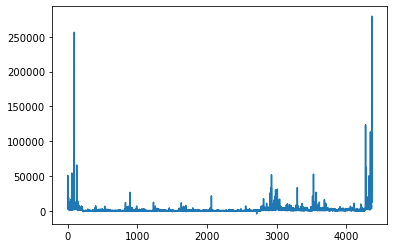

In [37]:
plt.plot(tx_user.Revenue)

In [38]:
import warnings
warnings.filterwarnings("ignore")

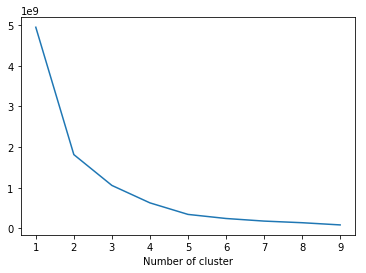

In [45]:
sse={}
tx_revenue = tx_user[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_revenue)
    tx_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

In [40]:
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

In [41]:
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,301,1,312,3,5288.63,2
1,14849.0,21,7,392,3,7904.28,2
2,12472.0,30,7,391,3,6229.48,2
3,12567.0,22,7,463,3,9114.94,2
4,15805.0,22,7,307,3,5452.17,2
...,...,...,...,...,...,...,...
4367,14646.0,1,8,2085,6,279489.02,8
4368,12415.0,23,7,778,4,123725.45,6
4369,17511.0,2,8,1076,5,88125.38,6
4370,14156.0,9,8,1420,5,113384.14,6


In [42]:
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3201.0,518.396630,391.329234,-4287.63,217.2000,414.880,754.6400,1487.80
1,852.0,2482.900799,761.297629,1489.50,1837.7600,2294.465,3027.0275,4301.22
2,222.0,6171.408694,1444.312402,4310.00,4975.4000,5813.525,7020.0425,9861.38
3,63.0,13792.051746,3315.591239,10097.37,10975.2600,12650.080,16196.4450,21535.90
4,16.0,30720.769375,4100.666256,25748.35,27348.6425,29686.460,33390.3900,40340.78
5,11.0,55776.831818,5198.356252,50415.49,51408.1650,54228.740,58402.6100,65892.08
6,4.0,114451.897500,19223.119671,88125.38,107069.4500,118554.795,125937.2425,132572.62
7,1.0,187482.170000,NaN,187482.17,187482.1700,187482.170,187482.1700,187482.17
8,2.0,267963.755000,16299.186073,256438.49,262201.1225,267963.755,273726.3875,279489.02


# Overall Segmentation

In [43]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,301,1,312,3,5288.63,2
1,14849.0,21,7,392,3,7904.28,2
2,12472.0,30,7,391,3,6229.48,2
3,12567.0,22,7,463,3,9114.94,2
4,15805.0,22,7,307,3,5452.17,2


In [44]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']

In [45]:
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,363.732759,13.853448,185.002845
1,314.302083,20.052083,303.166250
2,259.055970,19.477612,335.303358
3,207.564706,25.807843,407.536118
4,159.262172,29.041199,501.589101
5,114.807692,37.174825,704.003427
6,73.279843,34.684932,670.482198
7,44.143110,41.634276,726.788853
8,24.050222,56.127031,911.891462


In [46]:
tx_user['Segment'] = 'Low-Value'
 
tx_user.loc[tx_user['OverallScore']>6,'Segment'] = 'Normal-Value' 

tx_user.loc[tx_user['OverallScore']>12,'Segment'] = 'High-Value' 

In [47]:
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,17850.0,301,1,312,3,5288.63,2,6,Low-Value
1,14849.0,21,7,392,3,7904.28,2,12,Normal-Value
2,12472.0,30,7,391,3,6229.48,2,12,Normal-Value
3,12567.0,22,7,463,3,9114.94,2,12,Normal-Value
4,15805.0,22,7,307,3,5452.17,2,12,Normal-Value
...,...,...,...,...,...,...,...,...,...
4367,14646.0,1,8,2085,6,279489.02,8,22,High-Value
4368,12415.0,23,7,778,4,123725.45,6,17,High-Value
4369,17511.0,2,8,1076,5,88125.38,6,19,High-Value
4370,14156.0,9,8,1420,5,113384.14,6,19,High-Value


# Recommendations:
    
Based on the above R-F-M score, we can give some Recommendations.

# Best Customers: 
We can Reward them for their multiples purchases. They can be early adopters to very new products. Suggest them “Refer a friend”. Also, they can be the most loyal customers that have the habit to order.

# Lost Cheap Customers: 
Send them personalized emails/messages/notifications to encourage them to order.

# Big Spenders: 
Notify them about the discounts to keep them spending more and more money on your products

# Loyal Customers: 
Create loyalty cards in which they can gain points each time of purchasing and these points could transfer into a discount.



This is how we can target a customer based on the customer segmentation which will help in marketing campaigns. Thus saving marketing costs, grab the customer, make customers spend more thereby increasing the revenue.